# BitCoin Prediction

## Imports 

In [45]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries
from utils import backtest, plot_forecast, load_model, save_model

## Load the dataset

The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


<Axes: xlabel='Date'>

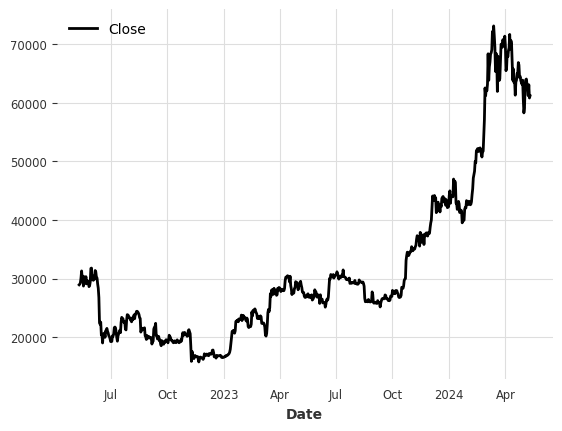

In [46]:
import yfinance as yf

kwargs = {
    'period': '2y',
}

bitcoin = yf.Ticker("BTC-USD").history(**kwargs)
# sp500 = yf.Ticker("^GSPC").history(**kwargs)

df = bitcoin

series = TimeSeries.from_dataframe(df, value_cols='Close')
series.plot()

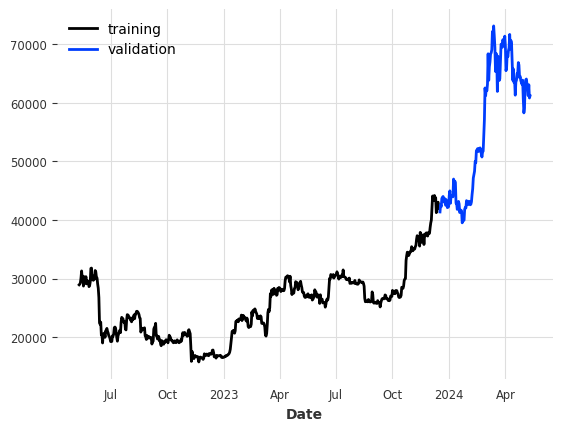

In [47]:
train, val = series.split_after(0.8)
train.plot(label="training")
val.plot(label="validation")

to_predict = len(val)

## Baseline Model

<Axes: xlabel='Date'>

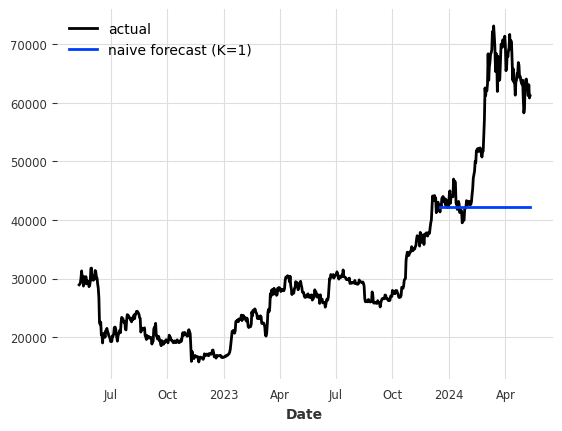

In [48]:
from darts.models import NaiveSeasonal

naive_model = NaiveSeasonal(K=1)
naive_model.fit(train)
naive_forecast = naive_model.predict(to_predict)

series.plot(label="actual")
naive_forecast.plot(label="naive forecast (K=1)")

## XGBoost Model

In [50]:
# write xgbmodel with backtesting and gridsearch optimization
from darts.models.forecasting.xgboost import XGBModel

params = {
    'lags': [6],
    'max_depth': [3, 4, 5],
}

xgb2_model = XGBModel(lags=6)

backtest([xgb2_model], series, dataset='bitcoin')

  0%|          | 0/3 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.
`enable_optimization=True` is ignored because `forecast_horizon > model.output_chunk_length`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/722 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.
`enable_optimization=True` is ignored because `forecast_horizon > model.output_chunk_length`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/722 [00:00<?, ?it/s]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.
`enable_optimization=True` is ignored because `forecast_horizon > model.output_chunk_length`.To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


  0%|          | 0/722 [00:00<?, ?it/s]

ValueError: Input `series` must be provided. This is the result either from fitting on multiple series, or from not having fit the model yet.


ValueError: Input `series` must be provided. This is the result either from fitting on multiple series, or from not having fit the model yet.

### Experiments

In [ ]:
backtest([naive_model], series, dataset='bitcoin')